# Luxury loan porfolio purpose

After search and look variables and make a analysis about the amount and efect that interest and purpose is necessary a different aproach about

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

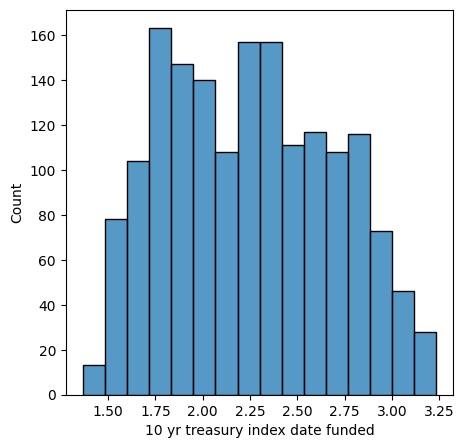

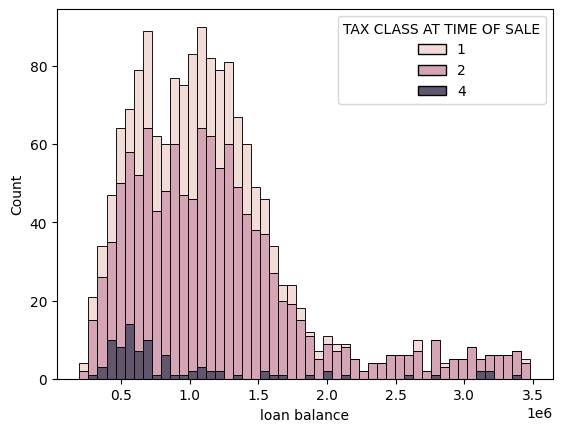

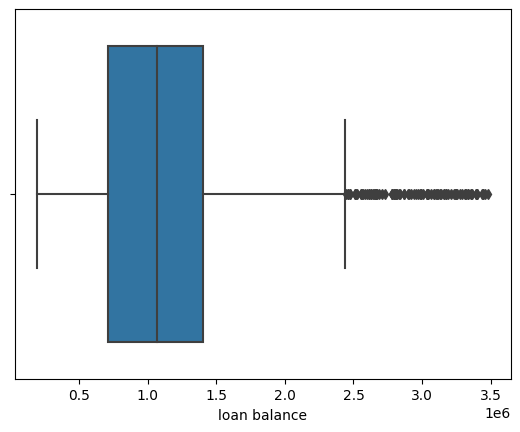

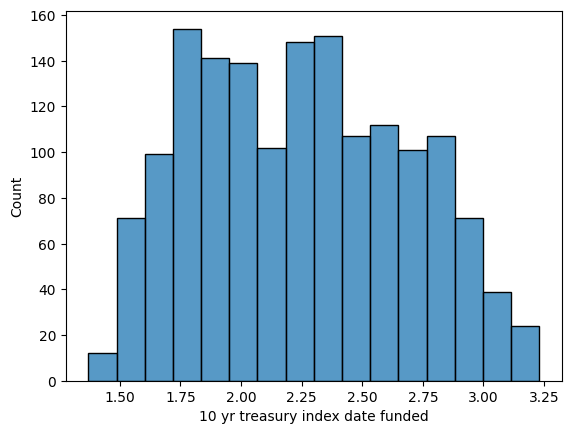

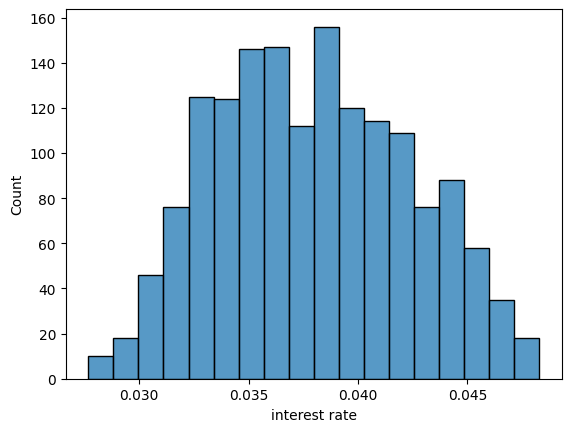

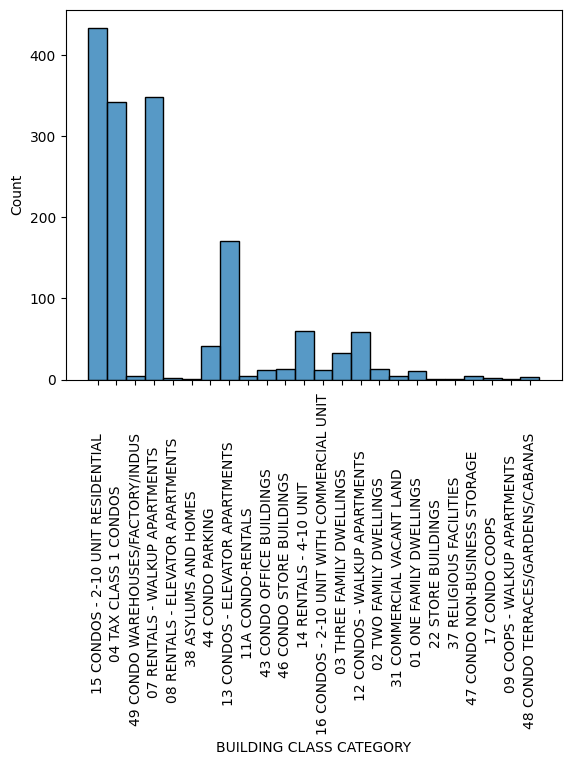

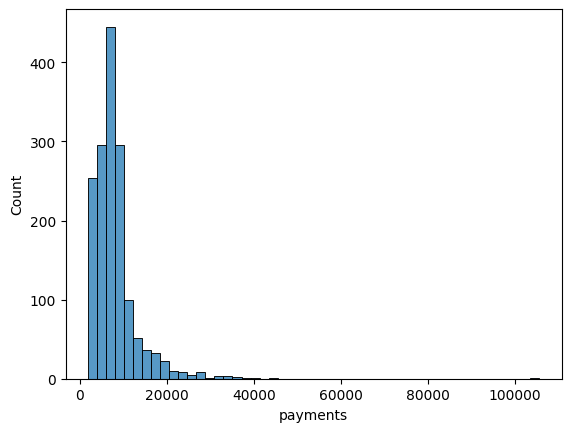

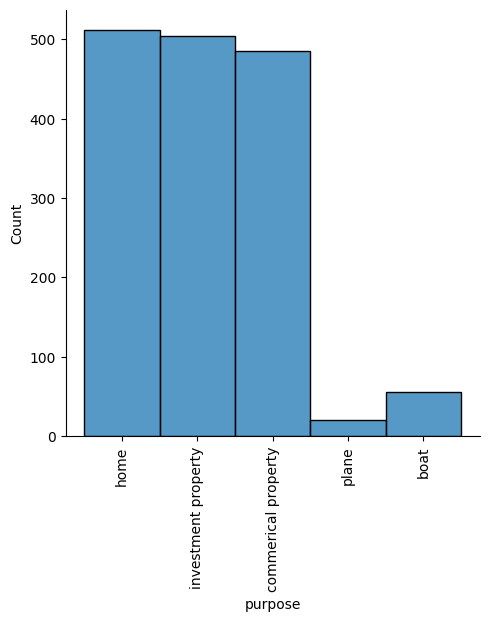

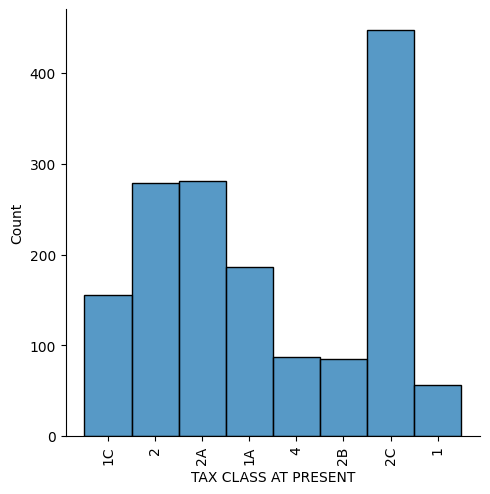

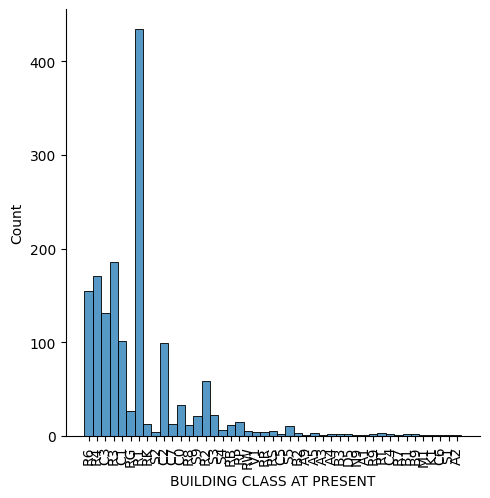

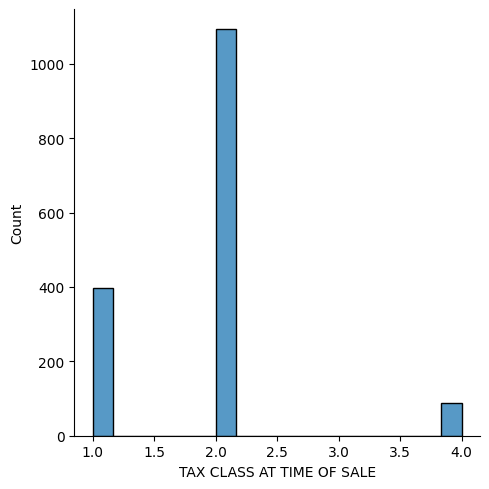

<Figure size 1000x1000 with 0 Axes>

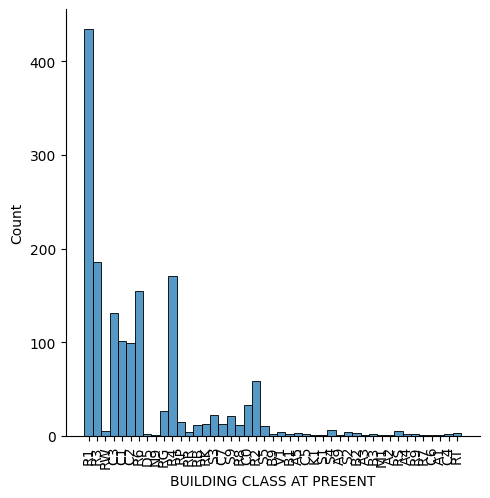

In [203]:
%run 01_luxury_loan_amount(monovariable_analysis).ipynb

In [204]:
#BUILDING CLASS AT PRESENT (R1) 
df_BCAT = df_processed['BUILDING CLASS AT PRESENT']=='R1'
df_BCAT_1 = df_processed[df_BCAT]
df_BCAT_1

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,purpose,title,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
0,790000.0,2012-04-27,20,240,1.9600,0.03359,4524.65,92,373732.18,930250.0,boat,Vice President Global Field Services,6,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
3,1079000.0,2012-02-23,20,240,1.9900,0.03389,6196.40,94,496538.75,1402450.0,boat,Vice presiden,17,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
6,630000.0,2017-12-07,15,180,2.3700,0.03669,4556.23,24,520650.57,667750.0,boat,Field CTO,1,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
7,795000.0,2017-10-06,20,240,2.3589,0.03758,4716.77,26,672363.91,895850.0,boat,vp of Sourcing and Supply Chain,11,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
8,2004000.0,2019-10-12,15,180,1.7600,0.03058,13895.23,2,1976209.55,2068050.0,boat,Vice Presiden,5,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,448000.0,2017-02-07,30,360,2.3931,0.03993,2137.01,34,375341.56,560900.0,home,director of accounts,12,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
1656,1580000.0,2014-01-16,15,180,2.8600,0.04158,11812.56,71,741307.98,1808800.0,plane,Physician,10,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
1665,649000.0,2017-08-03,20,240,2.2212,0.03621,3804.42,28,542476.34,813050.0,plane,Associate,12,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2
1670,2052000.0,2015-11-08,15,180,2.3400,0.03638,14808.84,49,1326366.60,2187750.0,plane,VP,3,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,1,0,0,2


In [205]:
df_numerical = df_processed_by_date[['funded_amount', 'duration months', '10 yr treasury index date funded', 'interest rate', 'total past payments', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TAX CLASS AT TIME OF SALE', 'property value', 'loan balance']]
df_numerical

,funded_amount,duration months,10 yr treasury index date funded,interest rate,total past payments,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,property value,loan balance
1585,468000.0,360,1.89,0.03490,96,0.0,0.0,1,734100.0,266503.91
172,4191000.0,360,1.89,0.03486,95,0.0,0.0,2,4337050.0,2406261.05
522,1690000.0,360,1.89,0.03488,95,0.0,0.0,2,1956050.0,970133.77
716,1560000.0,360,1.97,0.03568,95,0.0,0.0,2,1766000.0,888877.63
1607,560000.0,360,2.00,0.03599,95,1469.0,2900.0,2,705950.0,318158.57
...,...,...,...,...,...,...,...,...,...,...
1126,1270000.0,180,1.92,0.03219,0,0.0,0.0,1,1390550.0,1270000.00
1304,1120000.0,360,1.90,0.03499,0,2600.0,3280.0,2,1120350.0,1120000.00
1014,1330000.0,360,1.90,0.03499,0,0.0,0.0,2,1510300.0,1330000.00
1451,920000.0,360,1.88,0.03479,0,3124.0,4620.0,2,920250.0,920000.00


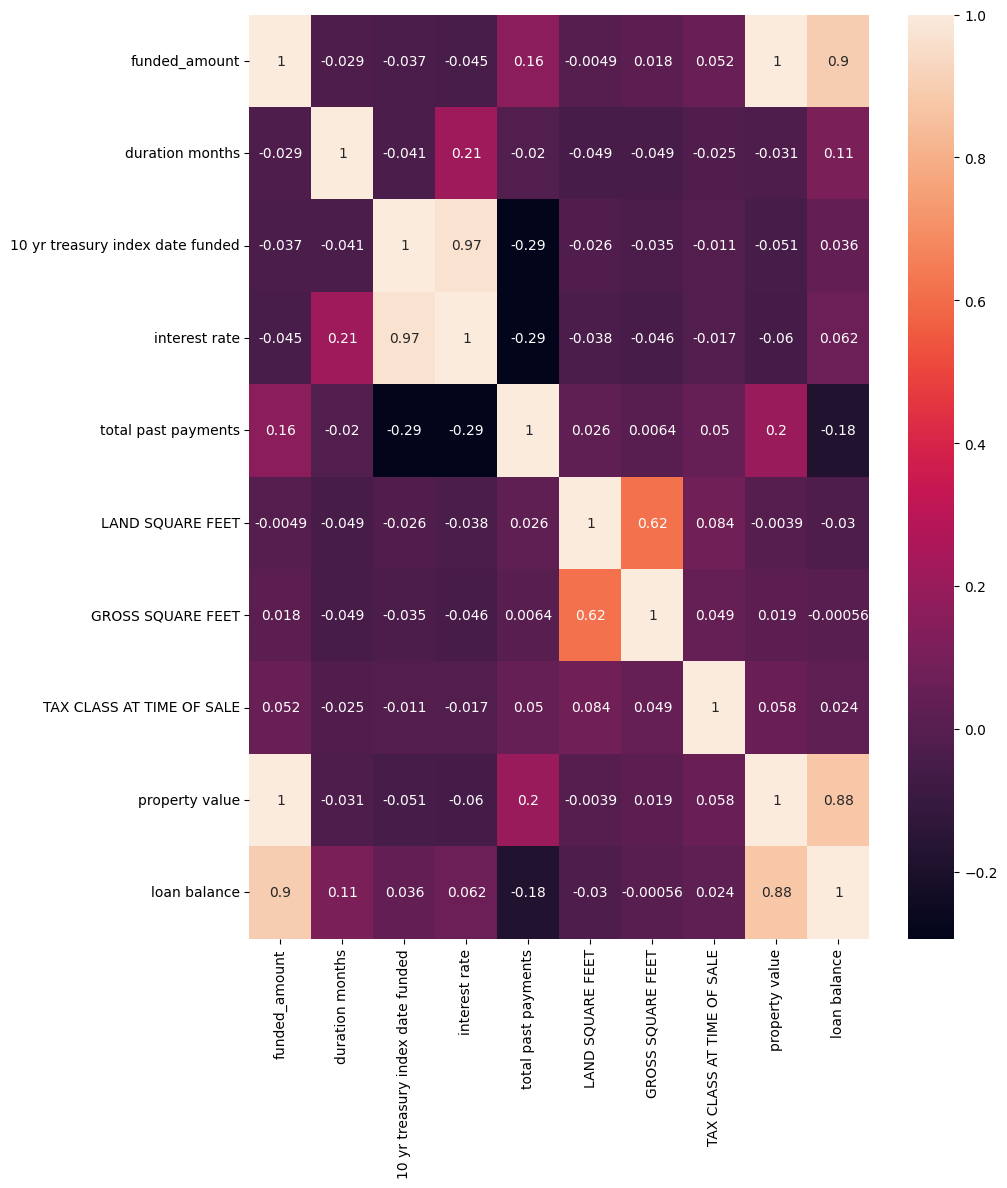

In [206]:
plt.figure(figsize=(10,12))
df_numerical.corr()
sns.heatmap(df_numerical.corr(),annot=True)
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'boat'),
  Text(1, 0, 'investment property'),
  Text(2, 0, 'commerical property'),
  Text(3, 0, 'home'),
  Text(4, 0, 'plane')])

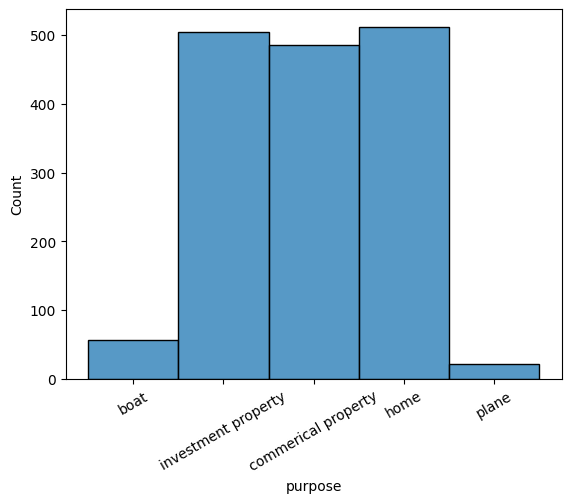

In [207]:
sns.histplot(data= df_processed, x = 'purpose')
plt.xticks(rotation = 30)

In [208]:
df_processed_by_date

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,purpose,title,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
1585,468000.0,2012-01-01,30,360,1.89,0.03490,2098.92,96,266503.91,734100.0,home,Sales Manager,13,04 TAX CLASS 1 CONDOS,1C,R6,1,0.0,0.0,1
172,4191000.0,2012-01-02,30,360,1.89,0.03486,18786.73,95,2406261.05,4337050.0,home,VP Sales,16,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
522,1690000.0,2012-01-02,30,360,1.89,0.03488,7577.54,95,970133.77,1956050.0,home,Partner,10,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
716,1560000.0,2012-01-03,30,360,1.97,0.03568,7064.45,95,888877.63,1766000.0,home,EXECUTIVE VICE PRESIDENT,11,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
1607,560000.0,2012-01-04,30,360,2.00,0.03599,2545.70,95,318158.57,705950.0,investment property,general manager,15,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,1469.0,2900.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,1270000.0,2019-12-21,15,180,1.92,0.03219,8904.77,0,1270000.00,1390550.0,investment property,President,16,04 TAX CLASS 1 CONDOS,1C,R6,1,0.0,0.0,1
1304,1120000.0,2019-12-25,30,360,1.90,0.03499,5028.68,0,1120000.00,1120350.0,investment property,Account Manager,1,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,2600.0,3280.0,2
1014,1330000.0,2019-12-26,30,360,1.90,0.03499,5971.55,0,1330000.00,1510300.0,investment property,Director of Accounting,5,12 CONDOS - WALKUP APARTMENTS,2,R2,1,0.0,0.0,2
1451,920000.0,2019-12-27,30,360,1.88,0.03479,4120.43,0,920000.00,920250.0,commerical property,Executive Director,5,07 RENTALS - WALKUP APARTMENTS,2B,C1,9,3124.0,4620.0,2


<Axes: xlabel='funded_amount', ylabel='loan balance'>

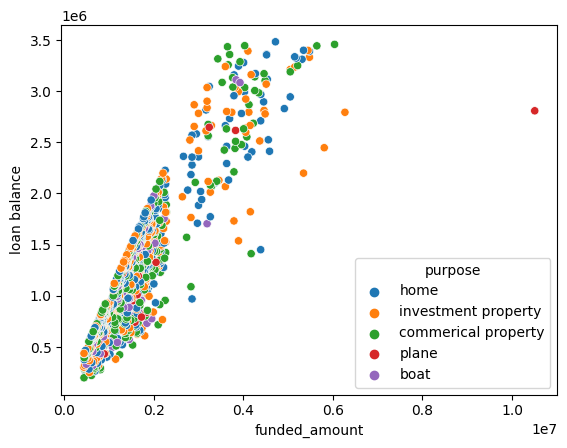

In [209]:
sns.scatterplot(data = df_processed_by_date, x = 'funded_amount', y= 'loan balance',hue = 'purpose')

In [210]:
df_final.drop(['1A','1','1C','2','2A','2B','2C','4','funded_date','purpose'],axis=1,inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1578 entries, 1585 to 913
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   funded_amount                     1578 non-null   float64
 1   duration years                    1578 non-null   int64  
 2   duration months                   1578 non-null   int64  
 3   10 yr treasury index date funded  1578 non-null   float64
 4   interest rate                     1578 non-null   float64
 5   payments                          1578 non-null   float64
 6   total past payments               1578 non-null   int64  
 7   loan balance                      1578 non-null   float64
 8   property value                    1578 non-null   float64
 9   title                             1578 non-null   object 
 10  employment length                 1578 non-null   int64  
 11  BUILDING CLASS CATEGORY           1578 non-null   object 
 12  TAX CLASS

In [298]:
X = df_final.drop(['home','boat','commerical property','investment property','plane','title','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT PRESENT','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE','duration years'],axis=1)
y = df_final[['home','commerical property','investment property']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['home', 'boat', 'commerical property', 'investment property', 'plane'] not found in axis"

In [256]:
df_corr = df_final.drop(['title','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT PRESENT','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE'],axis=1)
df_corr.head(5)

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,employment length,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,boat,commerical property,home,investment property,plane
1585,468000.0,30,360,1.89,0.03490,2098.92,96,266503.91,734100.0,13,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
172,4191000.0,30,360,1.89,0.03486,18786.73,95,2406261.05,4337050.0,16,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
522,1690000.0,30,360,1.89,0.03488,7577.54,95,970133.77,1956050.0,10,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
716,1560000.0,30,360,1.97,0.03568,7064.45,95,888877.63,1766000.0,11,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1607,560000.0,30,360,2.00,0.03599,2545.70,95,318158.57,705950.0,15,4,1469.0,2900.0,0.0,0.0,0.0,1.0,0.0


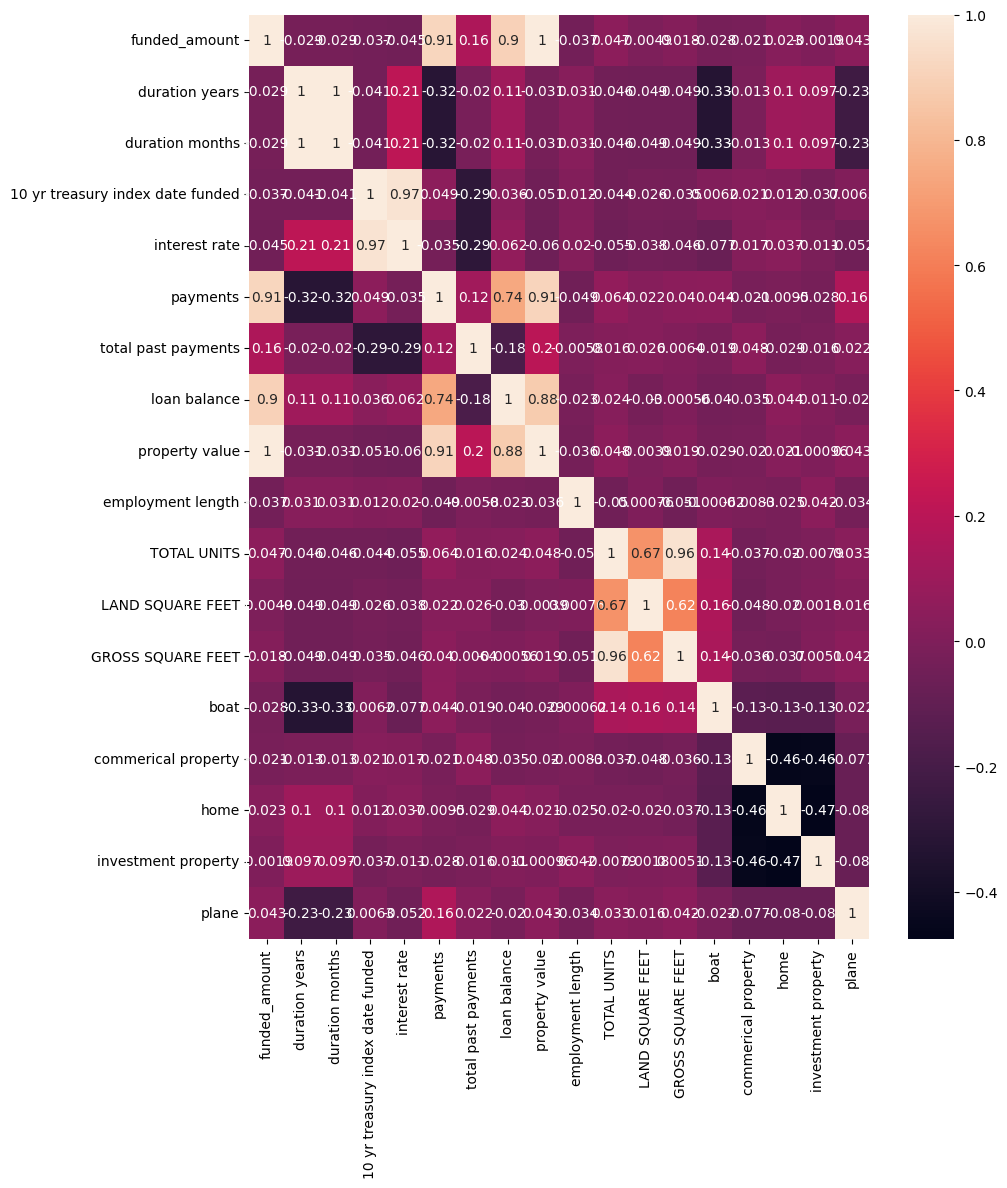

In [258]:
plt.figure(figsize=(10,12))
df_corr.corr()
sns.heatmap(df_corr.corr(),annot=True)
plt.show()

In [259]:
tree = DecisionTreeClassifier(max_depth=20, random_state=42)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [260]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print('test prediction is {}\n The train prediction is {}'.format(train_accuracy,test_accuracy))

test prediction is 0.9350237717908082
 The train prediction is 0.31329113924050633


### Run further in a singler desition tree will develop overfitting

In [276]:
random_forest = RandomForestClassifier(n_estimators=5,random_state=42)
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [277]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print('test prediction is {}\n The train prediction is {}'.format(train_accuracy,test_accuracy))

test prediction is 0.8835182250396196
 The train prediction is 0.25


<function matplotlib.pyplot.show(close=None, block=None)>

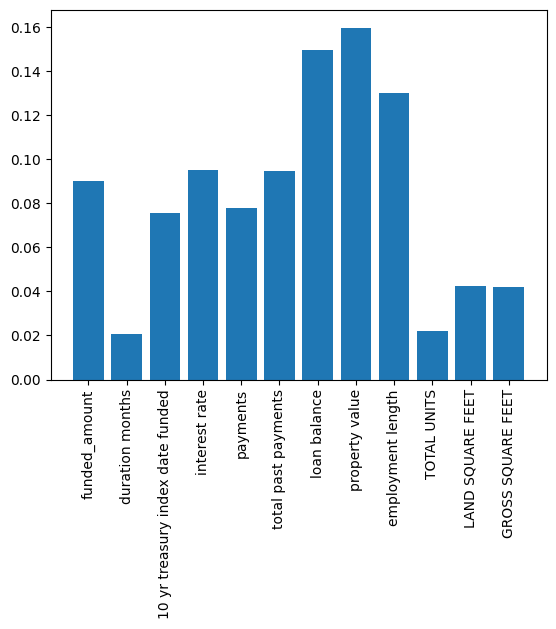

In [263]:
importances = tree.feature_importances_
columns = X.columns
plt.bar(columns,importances)
plt.xticks(rotation=90)
plt.show

In [301]:
X = df_processed_by_date[['funded_amount','duration months','10 yr treasury index date funded','interest rate','payments','total past payments','loan balance','property value','employment length','LAND SQUARE FEET','GROSS SQUARE FEET','interest rate','loan balance','TAX CLASS AT TIME OF SALE']]
y = df_processed_by_date['purpose']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, shuffle=True, test_size=0.2)

st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.fit_transform(X_test)

solvers = ['lbfgs','newton-cg','sag','saga']
multiclasses = ['multinomial','auto','ovr']
results = []
for i in solvers:
    for j in multiclasses:
        
        l = []
        
        model_purpose = LogisticRegression(random_state=42,solver=i,multi_class=j,n_jobs=-1)
        result = model_purpose.fit(X_train, y_train)
        prediction_train = model_purpose.predict(X_train)
        metric = accuracy_score(y_train,prediction_train)
        l.append(metric)
        l.append(i)
        l.append(j)
        results.append(l)
        
        l = []

print('result for the different solvers and multiclases {}'.format(results))


c:\Users\Cristian Durango\anaconda3\envs\porfolio\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Cristian Durango\anaconda3\envs\porfolio\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Cristian Durango\anaconda3\envs\porfolio\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Cristian Durango\anaconda3\envs\porfolio\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Cristian Durango\anaconda3\envs\porfolio\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

result for the different solvers and multiclases [[0.37717908082408874, 'lbfgs', 'multinomial'], [0.37717908082408874, 'lbfgs', 'auto'], [0.384310618066561, 'lbfgs', 'ovr'], [0.37717908082408874, 'newton-cg', 'multinomial'], [0.37717908082408874, 'newton-cg', 'auto'], [0.384310618066561, 'newton-cg', 'ovr'], [0.375594294770206, 'sag', 'multinomial'], [0.375594294770206, 'sag', 'auto'], [0.38193343898573695, 'sag', 'ovr'], [0.3787638668779715, 'saga', 'multinomial'], [0.3787638668779715, 'saga', 'auto'], [0.38114104595879555, 'saga', 'ovr']]


c:\Users\Cristian Durango\anaconda3\envs\porfolio\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Cristian Durango\anaconda3\envs\porfolio\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [264]:
df_plane_0 = df_processed_by_date['purpose'] == 'plane'
df_plane = df_processed_by_date[df_plane_0]
df_plane.describe()

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,employment length,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
count,2.100000e+01,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01,2.100000e+01,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.903143e+06,16.190476,194.285714,2.273381,0.035951,15749.244762,53.571429,1.055514e+06,2.077024e+06,7.809524,3.952381,1019.428571,3420.761905,1.761905
std,2.134484e+06,3.842122,46.105469,0.403311,0.003820,22423.692463,25.370399,7.511216e+05,2.145317e+06,4.094131,4.873153,1654.548687,5506.308363,0.436436
min,5.280000e+05,10.000000,120.000000,1.530000,0.028280,2930.650000,9.000000,2.788943e+05,7.784000e+05,1.000000,1.000000,0.000000,0.000000,1.000000
25%,8.850000e+05,15.000000,180.000000,1.920000,0.033190,5177.780000,32.000000,5.539527e+05,1.084950e+06,5.000000,1.000000,0.000000,0.000000,2.000000
50%,1.380000e+06,15.000000,180.000000,2.270000,0.035990,9069.600000,53.000000,8.352224e+05,1.627400e+06,8.000000,1.000000,0.000000,0.000000,2.000000
75%,1.728000e+06,20.000000,240.000000,2.620000,0.038980,13442.940000,73.000000,1.221925e+06,1.874650e+06,10.000000,5.000000,1875.000000,5400.000000,2.000000
max,1.050800e+07,20.000000,240.000000,2.920000,0.041580,105486.810000,94.000000,2.807463e+06,1.080030e+07,16.000000,16.000000,5000.000000,16376.000000,2.000000


In [265]:
df_boat_0 = df_processed_by_date['purpose'] == 'boat'
df_boat = df_processed_by_date[df_boat_0]
df_boat.describe()

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,employment length,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.441973e+06,17.767857,213.214286,2.263684,0.036175,9355.906607,45.428571,1.033641e+06,1.598675e+06,9.285714,5.964286,2041.464286,5274.017857,2.142857
std,6.950549e+05,2.683221,32.198653,0.463007,0.004656,4610.830604,27.041286,5.908818e+05,7.041468e+05,5.047823,8.593791,3211.956605,8918.768149,0.772918
min,4.960000e+05,10.000000,120.000000,1.530000,0.028480,2851.180000,2.000000,3.164629e+05,6.452500e+05,1.000000,1.000000,0.000000,0.000000,1.000000
25%,9.847500e+05,15.000000,180.000000,1.842500,0.032337,6163.212500,24.000000,5.920244e+05,1.124688e+06,4.750000,1.000000,0.000000,0.000000,2.000000
50%,1.374000e+06,20.000000,240.000000,2.278250,0.035920,8810.955000,43.500000,9.560265e+05,1.575725e+06,10.000000,4.000000,1825.000000,3732.000000,2.000000
75%,1.722500e+06,20.000000,240.000000,2.510000,0.038940,11470.212500,64.750000,1.432381e+06,1.869850e+06,13.000000,8.000000,2980.000000,6928.000000,2.000000
max,3.927000e+06,20.000000,240.000000,3.220000,0.046190,28119.740000,94.000000,3.110691e+06,4.092850e+06,18.000000,52.000000,19659.000000,52513.000000,4.000000


In [266]:
df_home_0 = df_processed_by_date['purpose'] == 'home'
df_home = df_processed_by_date[df_home_0]
df_home.describe()

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,employment length,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
count,5.120000e+02,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,5.120000e+02,5.120000e+02,512.000000,512.000000,512.000000,512.000000,512.000000
mean,1.603505e+06,28.183594,338.203125,2.257105,0.038191,8014.684980,47.060547,1.204380e+06,1.766274e+06,9.117188,2.593750,771.656250,1505.958984,1.878906
std,9.063476e+05,4.898329,58.779945,0.436599,0.004381,4884.769652,28.497300,6.329222e+05,9.181351e+05,5.135535,3.303766,1312.119344,2776.269240,0.650895
min,4.480000e+05,15.000000,180.000000,1.460000,0.028990,2098.920000,0.000000,2.632018e+05,5.189000e+05,1.000000,1.000000,0.000000,0.000000,1.000000
25%,9.996250e+05,30.000000,360.000000,1.880000,0.034690,5153.242500,21.000000,7.368793e+05,1.164475e+06,5.000000,1.000000,0.000000,0.000000,2.000000
50%,1.484000e+06,30.000000,360.000000,2.247250,0.038095,7219.045000,46.000000,1.121984e+06,1.643225e+06,9.000000,1.000000,0.000000,0.000000,2.000000
75%,1.812000e+06,30.000000,360.000000,2.570000,0.041190,8865.585000,72.000000,1.434296e+06,1.964638e+06,13.000000,4.000000,1875.000000,3080.250000,2.000000
max,5.478000e+06,30.000000,360.000000,3.230000,0.048280,36992.050000,96.000000,3.482132e+06,5.614600e+06,18.000000,25.000000,10000.000000,18000.000000,4.000000


In [267]:
df_investment_0 = df_processed_by_date['purpose'] == 'investment property'
df_investment = df_processed_by_date[df_investment_0]
df_investment.describe()

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,employment length,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
count,5.040000e+02,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02,5.040000e+02,504.000000,504.000000,504.000000,504.000000,504.000000
mean,1.570585e+06,28.154762,337.857143,2.226391,0.037879,7870.116706,47.607143,1.174299e+06,1.736729e+06,9.615079,2.670635,819.353175,1792.172619,1.880952
std,8.802145e+05,4.931726,59.180717,0.436969,0.004449,5020.548966,28.263395,6.060234e+05,8.883721e+05,5.132697,4.536428,1472.993439,5176.529133,0.731100
min,4.400000e+05,15.000000,180.000000,1.370000,0.027880,1900.780000,0.000000,2.500823e+05,5.441000e+05,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.028500e+06,30.000000,360.000000,1.860000,0.034287,5075.975000,23.750000,7.208890e+05,1.211738e+06,5.000000,1.000000,0.000000,0.000000,1.000000
50%,1.462000e+06,30.000000,360.000000,2.220000,0.037690,6854.250000,49.000000,1.095327e+06,1.592925e+06,10.000000,1.000000,0.000000,0.000000,2.000000
75%,1.802500e+06,30.000000,360.000000,2.562275,0.041372,8893.700000,72.000000,1.425262e+06,1.982888e+06,14.000000,4.000000,1881.250000,2843.750000,2.000000
max,6.270000e+06,30.000000,360.000000,3.230000,0.048190,43462.490000,95.000000,3.398053e+06,6.572950e+06,18.000000,72.000000,10500.000000,89376.000000,4.000000


In [268]:
df_commerical_0 = df_processed_by_date['purpose'] == 'commerical property'
df_commerical = df_processed_by_date[df_commerical_0]
df_commerical.describe()

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,employment length,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
count,4.850000e+02,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,4.850000e+02,4.850000e+02,485.000000,485.000000,485.000000,485.000000,485.000000
mean,1.544377e+06,27.247423,326.969072,2.263491,0.038069,7920.054639,50.286598,1.131971e+06,1.710914e+06,9.239175,2.478351,707.575258,1508.187629,1.783505
std,8.471170e+05,5.812197,69.746361,0.428608,0.004456,4467.975941,28.508124,6.224154e+05,8.616047e+05,5.047759,4.212590,1278.201646,4761.560861,0.617024
min,4.440000e+05,15.000000,180.000000,1.370000,0.027680,1962.170000,0.000000,1.978503e+05,4.732000e+05,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.007500e+06,30.000000,360.000000,1.910000,0.034590,5079.940000,26.000000,7.118918e+05,1.204400e+06,5.000000,1.000000,0.000000,0.000000,1.000000
50%,1.440000e+06,30.000000,360.000000,2.230000,0.037800,7182.240000,52.000000,1.047800e+06,1.612950e+06,9.000000,1.000000,0.000000,0.000000,2.000000
75%,1.752000e+06,30.000000,360.000000,2.630000,0.041690,8962.000000,76.000000,1.357311e+06,1.948350e+06,13.000000,3.000000,1750.000000,2626.000000,2.000000
max,6.039000e+06,30.000000,360.000000,3.220000,0.048190,29416.570000,95.000000,3.456857e+06,6.182600e+06,18.000000,72.000000,12000.000000,89376.000000,4.000000


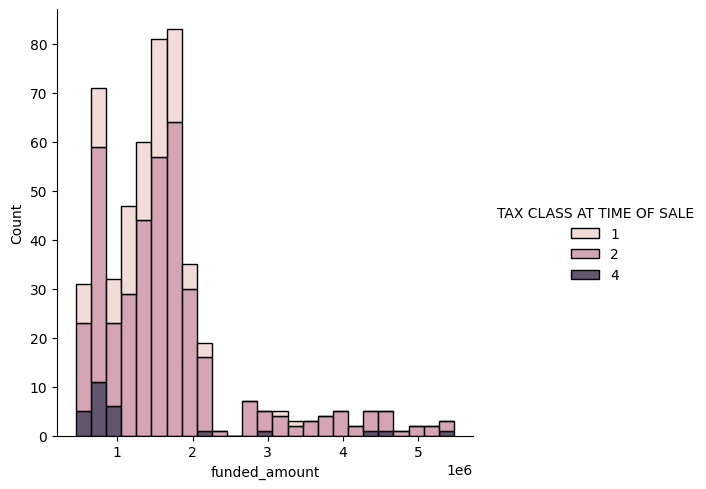

In [287]:
def pairplot(data_):
    sns.displot(data=data_,x = 'funded_amount',hue ='TAX CLASS AT TIME OF SALE',multiple='stack')

pairplot(df_home)

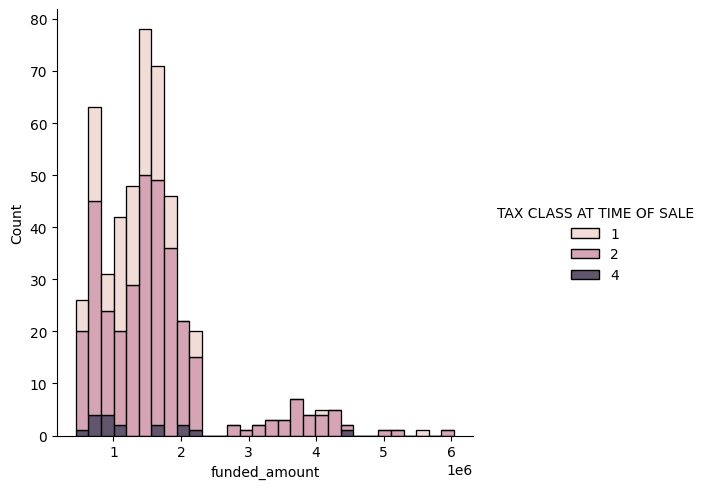

In [288]:
pairplot(df_commerical)

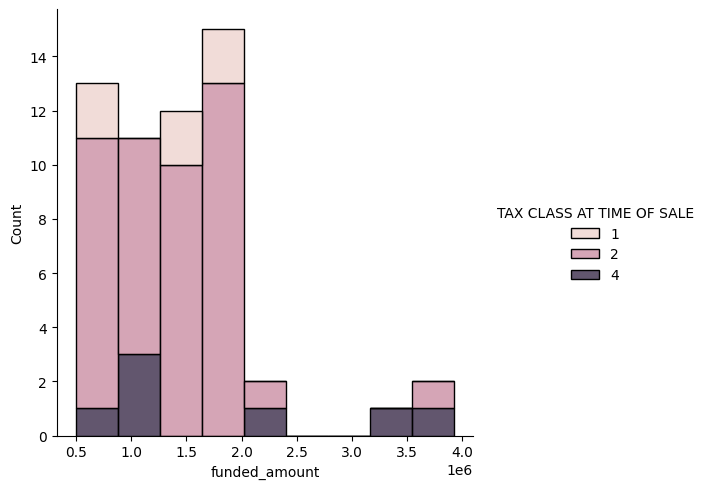

In [289]:
pairplot(df_boat)

<Axes: xlabel='interest rate', ylabel='funded_amount'>

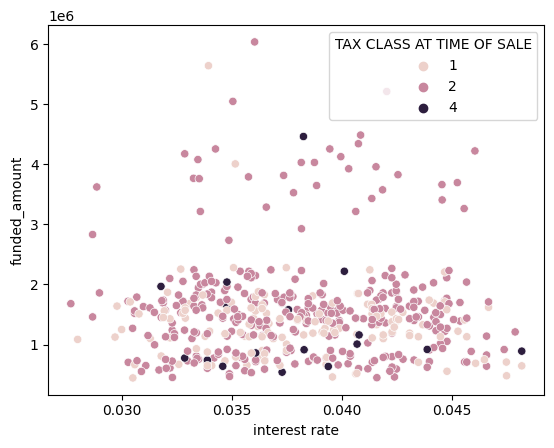

In [286]:
sns.scatterplot(data=df_commerical,x='interest rate',y='funded_amount',hue='TAX CLASS AT TIME OF SALE')

### In this case the prediction are blind by the similar quantity and values that no make a relation close for a good prediction for this reason, is hard predict the characteristics give for the different purpose

### In this case the tree desicion, random forest and logistic regression are no able of build a good prediction for propuse even when boats and planes loan are extract in the process

### For this reason is recommend use deep learning structures that could give more relaible results